### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### monero_price

#### 1. Read the Data

In [2]:
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/monero_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,106.75,122.63,95.81,118.82,113378000,1605070000
1,2017-09-04,126.23,126.23,101.73,106.17,89194700,1897480000
2,2017-09-03,124.93,129.29,115.74,126.01,92631100,1877380000
3,2017-09-02,141.35,141.40,121.96,124.80,128849000,2123430000
4,2017-09-01,140.65,150.09,136.49,141.20,163961000,2112260000


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [4]:
df.count()

Date          1203
Open          1203
High          1203
Low           1203
Close         1203
Volume        1203
Market Cap    1203
dtype: int64

as we can see we have in this file 7 columns and each column has 1203 cells

In [5]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1203.000000,1203.000000,1203.000000,1203.000000,1.203000e+03,1.203000e+03
mean,8.569395,9.154209,8.106735,8.663258,4.844432e+06,1.189434e+08
std,17.749751,19.112540,16.622019,18.029172,1.831849e+07,2.655690e+08
min,0.220121,0.251757,0.212967,0.223522,7.900000e+03,1.260140e+06
25%,0.509520,0.538536,0.492051,0.507895,3.570800e+04,4.203825e+06
50%,1.240000,1.340000,1.140000,1.240000,1.324030e+05,6.374590e+06
75%,8.280000,8.555000,7.840000,8.290000,3.031370e+06,1.090735e+08
max,144.240000,154.580000,136.490000,145.400000,3.018430e+08,2.163850e+09


In [6]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 7 columns):
Date          1203 non-null datetime64[ns]
Open          1203 non-null float64
High          1203 non-null float64
Low           1203 non-null float64
Close         1203 non-null float64
Volume        1203 non-null int64
Market Cap    1203 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 65.9 KB


In [7]:
#check if the dataset is duplicated
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1198    False
1199    False
1200    False
1201    False
1202    False
Length: 1203, dtype: bool

as we can see the data fram has 7 columns. each column has 85 cells, and there is no missing data, 


In [8]:
# Count missing data in each column
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

we can see there is no missing data 

In [9]:
# correlation between columns
correlation = df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.993219,0.997906,0.993541,0.749803,0.999424
High,0.993219,1.000000,0.993523,0.996990,0.799187,0.992571
Low,0.997906,0.993523,1.000000,0.996379,0.749803,0.997333
Close,0.993541,0.996990,0.996379,1.000000,0.786370,0.993100
Volume,0.749803,0.799187,0.749803,0.786370,1.000000,0.751391
Market Cap,0.999424,0.992571,0.997333,0.993100,0.751391,1.000000


let's plot data between Market Cap and other variable, then see the relation between the data


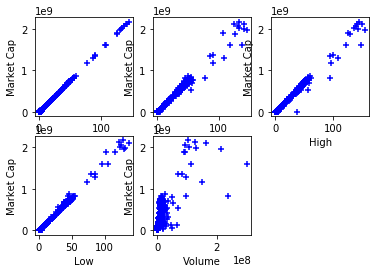

In [10]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(df.Open, df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(df.Close, df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(df.High, df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(df.Low, df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(df.Volume, df['Market Cap'],'Volume')

In [11]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']]
Market_Cap  = df['Market Cap']

In [12]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Model Score
model.score(Open, Market_Cap)

0.998848069511456

#### 4. Data Visualization

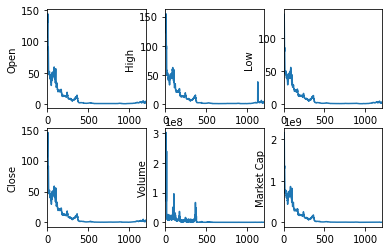

In [14]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df['Market Cap'].plot()